In [10]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import os
print(os.getcwd())


c:\Users\Sunny Kumar\Downloads\Salary-Prediction-using-Ensemble-Learning-main\Salary-Prediction-using-Ensemble-Learning-main\code


In [11]:
df_train = pd.read_csv(r"C:\Users\Sunny Kumar\Downloads\Salary-Prediction-using-Ensemble-Learning-main\Salary-Prediction-using-Ensemble-Learning-main\data\salary_train.csv")
df_test = pd.read_csv(r"C:\Users\Sunny Kumar\Downloads\Salary-Prediction-using-Ensemble-Learning-main\Salary-Prediction-using-Ensemble-Learning-main\data\salary_test.csv")

In [12]:
# step 3:show the data
df_train.head()


,ID,education_level,years_experience,job_title,industry,location,company_size,certifications,age,working_hours,crucial_code,salary
0,1,High School,12.0,Data Scientist,Education,New York,Medium,1.0,48.0,52.0,XEV156,NaN
1,2,PhD,17.0,Data Scientist,IT,New York,NaN,0.0,39.0,34.0,NaN,NaN
2,3,PhD,12.0,Software Engineer,Education,New York,Large,4.0,NaN,42.0,FIK684,95136.09799
3,4,Bachelors,1.0,Analyst,Healthcare,New York,Small,2.0,34.0,NaN,DKD155,70682.30628
4,5,High School,0.0,Analyst,IT,New York,Small,1.0,38.0,40.0,ZZH645,64887.65469


In [13]:
df_test.head()
df_train.head()

,ID,education_level,years_experience,job_title,industry,location,company_size,certifications,age,working_hours,crucial_code,salary
0,1,High School,12.0,Data Scientist,Education,New York,Medium,1.0,48.0,52.0,XEV156,NaN
1,2,PhD,17.0,Data Scientist,IT,New York,NaN,0.0,39.0,34.0,NaN,NaN
2,3,PhD,12.0,Software Engineer,Education,New York,Large,4.0,NaN,42.0,FIK684,95136.09799
3,4,Bachelors,1.0,Analyst,Healthcare,New York,Small,2.0,34.0,NaN,DKD155,70682.30628
4,5,High School,0.0,Analyst,IT,New York,Small,1.0,38.0,40.0,ZZH645,64887.65469


In [14]:
df_train.columns = df_train.columns.str.strip()

# Drop rows where 'salary' is missing (if present)
if "salary" in df_train.columns:
	df_train = df_train.dropna(subset=["salary"])

df_train.head()
df_test.head()

,ID,education_level,years_experience,job_title,industry,location,company_size,certifications,age,working_hours,crucial_code
0,1,Masters,10.0,Manager,IT,London,NaN,3.0,22.0,36.0,NaN
1,2,PhD,2.0,Manager,Education,Bangalore,Small,NaN,54.0,58.0,WMZ413
2,3,PhD,15.0,Analyst,Finance,New York,Large,3.0,28.0,57.0,WQE613
3,4,Masters,NaN,Analyst,IT,London,Medium,1.0,48.0,36.0,UUF012
4,5,Masters,12.0,Manager,IT,London,Large,4.0,30.0,59.0,JGD966


In [15]:
# Step 5: EDA – Visualizations

# Ensure column names are stripped of whitespace
df_test.columns = df_test.columns.str.strip()

# Only plot if 'salary' column exists and has non-null values
if "salary" in df_test.columns and df_test["salary"].notnull().any():
	plt.figure(figsize=(10, 5))
	sns.histplot(df_test["salary"].dropna(), kde=True, bins=30, color="skyblue")
	plt.title("Salary Distribution")
	plt.xlabel("Salary")
	plt.ylabel("Frequency")
	plt.grid(True)
	plt.show()

	# Drop rows with missing education_level or salary for boxplot
	boxplot_data = df_test.dropna(subset=["education_level", "salary"])

	if not boxplot_data.empty:
		plt.figure(figsize=(10, 5))
		sns.boxplot(x="education_level", y="salary", data=boxplot_data)
		plt.title("Salary by Education Level")
		plt.xticks(rotation=45)
		plt.grid(True)
		plt.show()
	else:
		print("No data available for boxplot (education_level and salary).")
else:
	print("No 'salary' column with non-null values found in df_test.")

No 'salary' column with non-null values found in df_test.


In [16]:
# Step 6: Separate target variable from training set (do not overwrite X)
y = df_train["salary"]

In [17]:
# Step 7: Handle Missing Values (fixed)
# Use df_train instead of X, since X is created in the next cell

for col in df_train.select_dtypes(include=["float64", "int64"]).columns:
    if df_train[col].isnull().any():
        df_train[col] = df_train[col].fillna(df_train[col].mean())

for col in df_train.select_dtypes(include=["object"]).columns:
    if df_train[col].isnull().any():
        # Check if mode is not empty before filling
        mode_val = df_train[col].mode()
        if not mode_val.empty:
            df_train[col] = df_train[col].fillna(mode_val[0])
        else:
            # If mode is empty, fill with a placeholder or leave as is
            df_train[col] = df_train[col].fillna("Unknown")

In [18]:
# Step 8: Encode Categorical Columns

# Prepare X by dropping the target column from df_train
X = df_train.drop(columns=["salary"])

# Encode categorical columns using one-hot encoding
X = pd.get_dummies(X)


In [19]:
# Step 9: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Step 10: Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
# Step 11: Train Model

# Remove rows where y_train is NaN
not_nan_mask = ~y_train.isna()
X_train_clean = X_train[not_nan_mask]
y_train_clean = y_train[not_nan_mask]

model = RandomForestRegressor(n_estimators=30, random_state=42, n_jobs=-1)
model.fit(X_train_clean, y_train_clean)

RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=42)

In [22]:
# Step 12: Evaluate Model

# Remove rows where y_val is NaN
not_nan_mask_val = ~y_val.isna()
X_val_clean = X_val[not_nan_mask_val]
y_val_clean = y_val[not_nan_mask_val]

y_pred = model.predict(X_val_clean)
rmse = np.sqrt(mean_squared_error(y_val_clean, y_pred))
print(f"\n📉 Validation RMSE: ₹{rmse:.2f}\n")


📉 Validation RMSE: ₹8503.96



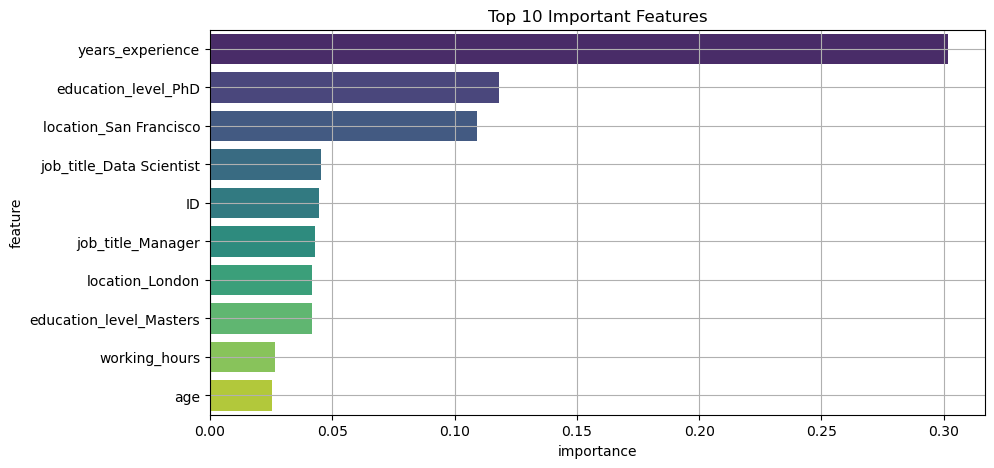

In [23]:
# Step 13: Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feat_df = pd.DataFrame({"feature": feature_names, "importance": importances})
feat_df = feat_df.sort_values(by="importance", ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x="importance", y="feature", data=feat_df, palette="viridis", hue="feature", legend=False)
plt.title("Top 10 Important Features")
plt.grid(True)
plt.show()


In [24]:
# Step 14: Prepare Test Set (fixed)
X_test = df_test.drop(columns=["ID"])
test_ids = df_test["ID"]
for col in X_test.select_dtypes(include=["float64", "int64"]).columns:
    if col in X.columns:
        X_test[col] = X_test[col].fillna(X[col].mean())

for col in X_test.select_dtypes(include=["object"]).columns:
    if col in X.columns:
        X_test[col] = X_test[col].fillna(X[col].mode()[0])

X_test_encoded = pd.get_dummies(X_test)
X_test_encoded = X_test_encoded.reindex(columns=X.columns, fill_value=0)
X_test_scaled = scaler.transform(X_test_encoded)

In [25]:
# Step 15: Predict and Show Output
y_test_pred = model.predict(X_test_scaled)
results = pd.DataFrame({
    "ID": test_ids,
    "Predicted_Salary": y_test_pred
})

# 🎯 Display Predictions
print("📊 Sample Salary Predictions:\n")
print(results.head(10).to_string(index=False))

# Save to CSV file
results.to_csv("salary_predictions.csv", index=False)


📊 Sample Salary Predictions:

 ID  Predicted_Salary
  1      99063.572897
  2      88476.782547
  3      98051.914501
  4      86311.579025
  5      97734.978905
  6     105893.398489
  7      97031.770036
  8      91767.568771
  9     100719.242730
 10      78384.198220
